In [54]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#load data
ca_dataset = fetch_california_housing()
ca = pd.DataFrame(ca_dataset.data, columns=ca_dataset.feature_names)

#first 5 rows
ca.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [55]:
#dropping coordinate data
ca.drop(["Latitude", "Longitude"], axis=1, inplace=True)

In [56]:
#get summary
ca.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07
std,1.90,12.59,2.47,0.47,1132.46,10.39
min,0.50,1.00,0.85,0.33,3.00,0.69
25%,2.56,18.00,4.44,1.01,787.00,2.43
50%,3.53,29.00,5.23,1.05,1166.00,2.82
75%,4.74,37.00,6.05,1.10,1725.00,3.28
max,15.00,52.00,141.91,34.07,35682.00,1243.33


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>],
       [<Axes: title={'center': 'AveRooms'}>,
        <Axes: title={'center': 'AveBedrms'}>],
       [<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>]], dtype=object)

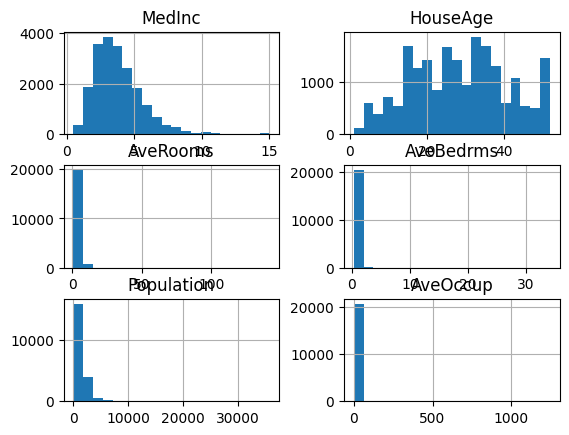

In [57]:
ca.hist(bins=20)

In [58]:
#correlation matrix
corr_matrix = ca.corr().round(2)
print(corr_matrix)

            MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup
MedInc        1.00     -0.12      0.33      -0.06        0.00      0.02
HouseAge     -0.12      1.00     -0.15      -0.08       -0.30      0.01
AveRooms      0.33     -0.15      1.00       0.85       -0.07     -0.00
AveBedrms    -0.06     -0.08      0.85       1.00       -0.07     -0.01
Population    0.00     -0.30     -0.07      -0.07        1.00      0.07
AveOccup      0.02      0.01     -0.00      -0.01        0.07      1.00


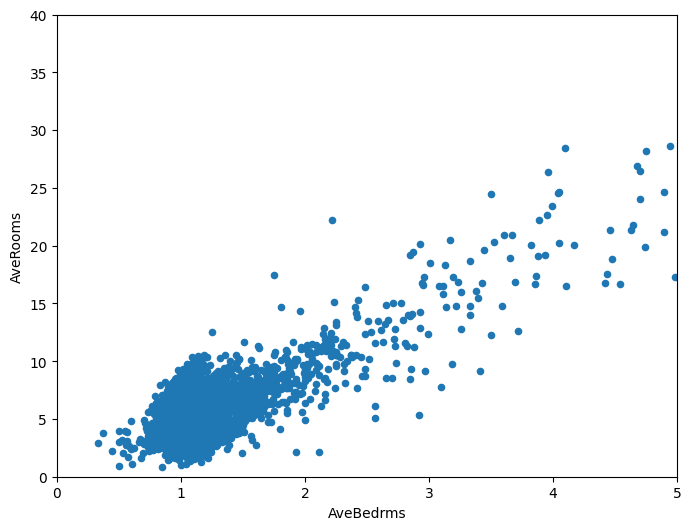

In [59]:
#check scatter trend (avebedrms and averooms ahve the strongest + correlation of 0.85)
ca.plot(kind='scatter', x='AveBedrms', y='AveRooms', figsize=(8, 6))
plt.ylim(0, 40)
plt.xlim(0, 5)
plt.show()

In [60]:
#assign into panda series for the 2 axes
X = ca[['AveBedrms']]
Y = ca[['AveRooms']]
print(X.shape)
Y.shape

(20640, 1)


(20640, 1)

In [61]:
#split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(14448, 1)
(6192, 1)
(14448, 1)
(6192, 1)


In [62]:
#model
model = LinearRegression()
model.fit(X_train, Y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [64]:
#model intercept, coeeficients
print(model.intercept_.round(2))
model.coef_.round(2)

[0.63]


array([[4.38]])

In [65]:
#try prediction
new_avebedrms = np.array([1.5]).reshape(-1, 1)  #2d
model.predict(new_avebedrms)

c:\Users\TYC\Desktop\python code\sklearn\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[7.19706164]])

In [66]:
#by the intercept and cooef obtined
print(model.intercept_ + model.coef_* 1.5)

[[7.19706164]]


In [69]:
#on test set
y_test_pred = model.predict(X_test)
y_test_pred.shape

(6192, 1)